# Tensorflow Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

closes = pd.read_csv('../raw_data/closes.csv', index_col='timestamp', parse_dates=True)
returns = pd.read_csv('../raw_data/returns.csv', index_col='timestamp', parse_dates=True)

## Holdout

In [2]:
train_size = int(0.8 * len(closes))
closes_train = closes[:train_size]
closes_test = closes[train_size:]
returns_train = returns[:train_size]
returns_test = returns[train_size:]

# Close Price Prediction

In [3]:
input_chunk = 52
output_chunk = 4
closes_train_X = closes_train[-52-output_chunk:-output_chunk]
closes_train_y = closes_train[-output_chunk:]
closes_train

,A,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-04 05:00:00+00:00,38.59,40.37,145.56,96.96,55.65,40.67,98.20,87.85,49.98,34.39,...,57.74,36.18,74.69,56.99,9.59,34.37,68.14,101.55,24.60,45.88
2016-01-11 05:00:00+00:00,37.11,38.76,144.29,97.13,57.34,40.54,99.27,89.17,49.82,31.51,...,58.37,36.50,77.58,56.49,9.10,32.98,67.09,101.08,22.34,43.38
2016-01-18 05:00:00+00:00,37.98,40.16,144.43,101.42,58.83,40.03,102.24,89.63,51.38,33.23,...,59.17,36.63,76.57,57.52,9.07,34.03,68.98,99.15,21.51,43.40
2016-01-25 05:00:00+00:00,37.65,38.99,152.05,97.34,54.90,37.85,105.54,89.13,53.86,35.35,...,67.34,38.22,77.85,58.89,9.75,35.95,72.37,99.26,22.68,43.05
2016-02-01 05:00:00+00:00,36.04,36.75,143.94,94.02,53.12,37.41,98.97,79.20,49.82,34.07,...,61.91,39.53,80.08,58.99,9.46,36.66,69.76,95.01,21.63,40.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-22 05:00:00+00:00,129.87,13.74,173.59,163.62,136.35,101.90,298.13,381.02,158.67,89.56,...,62.33,74.93,97.87,33.61,17.04,92.97,112.16,107.51,56.44,159.89
2022-08-29 05:00:00+00:00,128.01,12.99,171.73,155.81,136.28,102.50,284.07,368.14,148.63,87.61,...,59.18,74.41,95.59,31.80,15.79,91.21,112.74,105.57,55.04,156.98
2022-09-05 05:00:00+00:00,137.63,14.19,180.65,157.37,141.42,108.48,290.55,394.78,154.18,91.47,...,62.78,76.98,96.50,33.96,16.38,96.87,116.09,114.50,58.67,164.31


In [4]:
X_train = closes_train_X.values.T
X_train = np.expand_dims(X_train, axis=2)
y_train = closes_train_y.values.T
y_train = np.expand_dims(y_train, axis=2)
X_train.shape, y_train.shape

((421, 52, 1), (421, 4, 1))

In [5]:
single_X_train = X_train[0, :, :]
single_y_train = y_train[0, :, :]
single_X_train.shape, single_y_train.shape

((52, 1), (4, 1))

In [10]:
from tensorflow.keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, LSTM

normalizer = Normalization()
normalizer.adapt(X_train)
X_train_normalized = normalizer(X_train)
X_train_normalized.shape


TensorShape([421, 52, 1])

In [14]:
model = Sequential()
model.add(normalizer)
model.add(LSTM(units = 25, activation='tanh', return_sequences=True))#, input_shape = (52,1)))
#model.add(SimpleRNN(units = 25, activation='tanh', return_sequences=True))
#model.add(Dense(10, activation='relu'))
#model.add(Dense(1, activation='linear'))

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [10]:
# y_train = y_train[:,0]

In [11]:
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(verbose=1,
                   patience=5,
                   restore_best_weights=True)
history = model.fit(X_train,
                    y_train,
                    epochs=500,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[es])

Epoch 1/500


ValueError: in user code:

    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/behnamnajafi/.pyenv/versions/3.10.6/envs/lwhf/lib/python3.10/site-packages/keras/losses.py", line 1486, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 52 and 4 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_1/dense_3/BiasAdd, IteratorGetNext:1)' with input shapes: [?,52,1], [?,4,1].


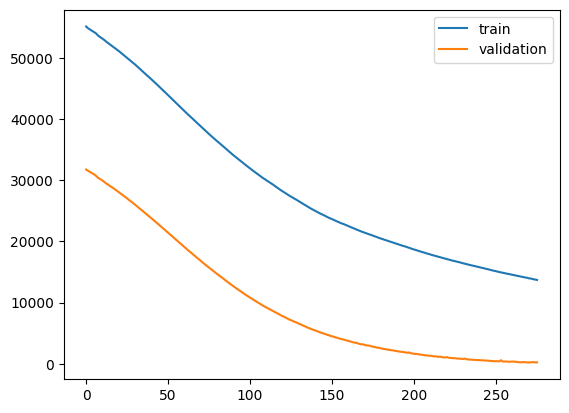

In [78]:
# plot the history

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

14/14 [==============================] - 0s 1ms/step


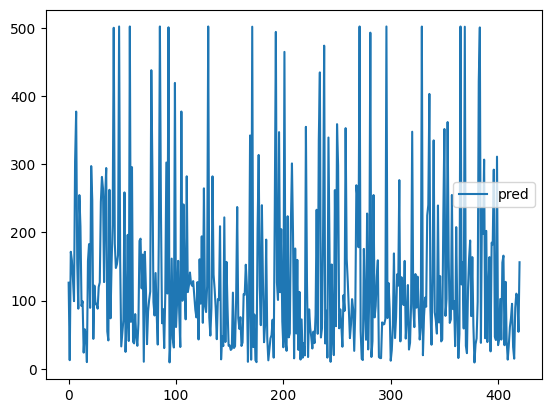

In [79]:
train_pred = model.predict(X_train)

#plt.plot(y_train, label='true')
plt.plot(train_pred, label='pred')
plt.legend()